Graph data loaded from /Users/onature/Desktop/FALL-2024/MATH482/Projects/Twitch-GNN/twitch_graph_data.pt


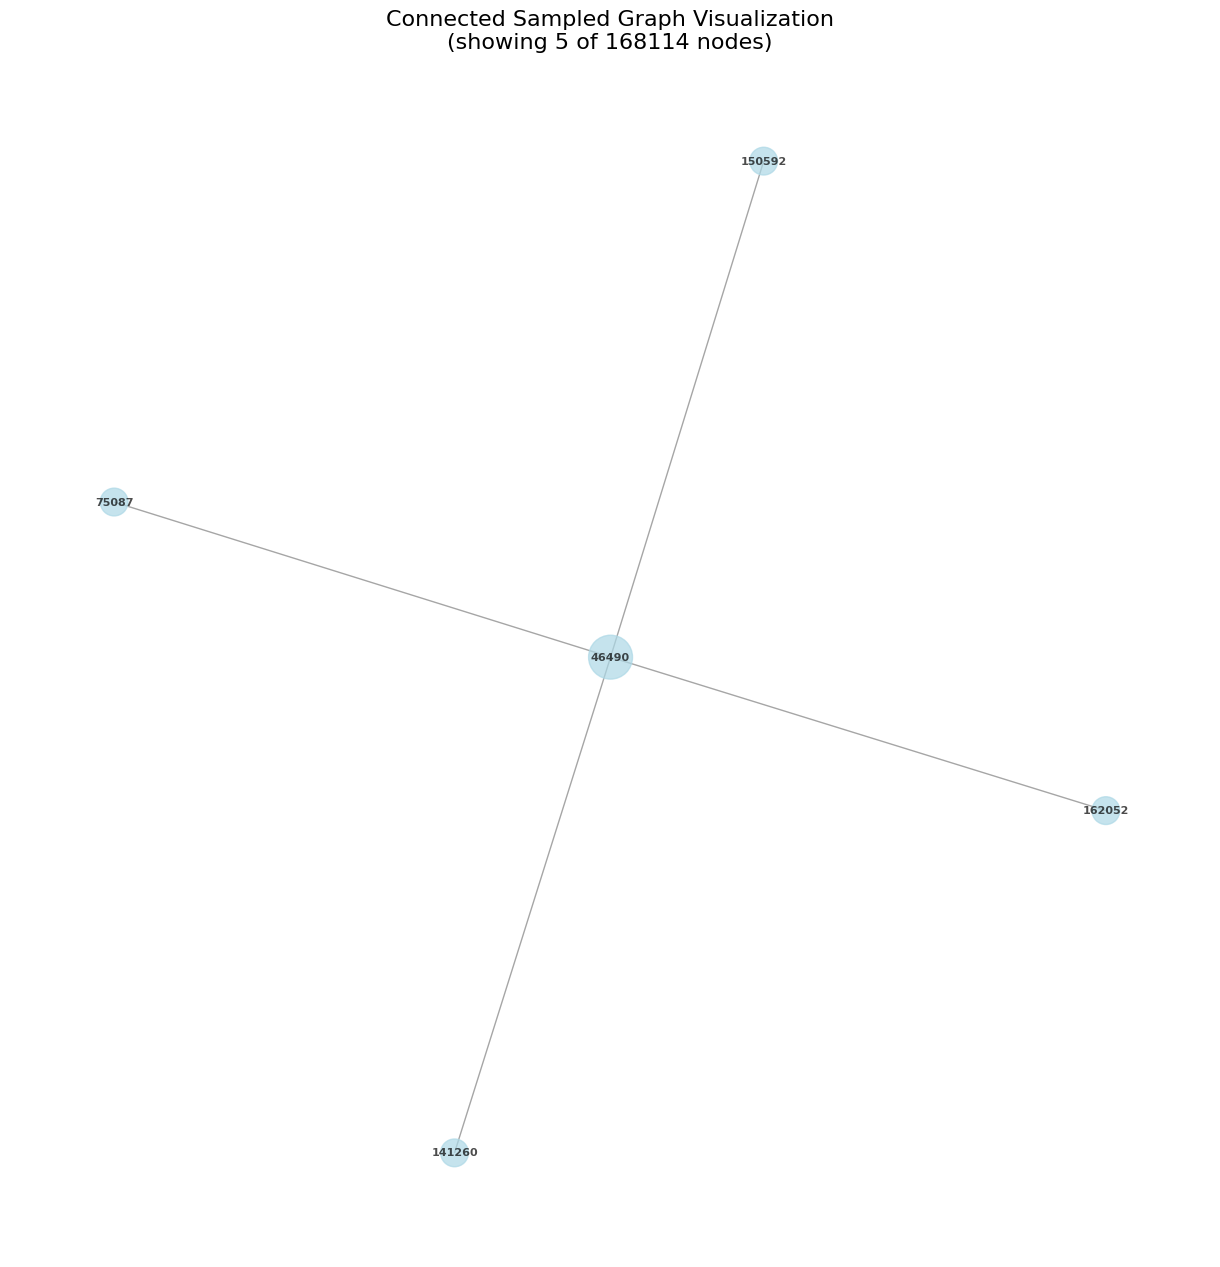


Full Graph Statistics:
Number of nodes: 168114
Number of edges: 6797557
Average degree: 80.87

Sampled Graph Statistics:
Number of nodes: 5
Number of edges: 4
Average degree: 1.60

Connectivity Information:
Is sampled graph connected: True
Graph diameter: 2
Average shortest path length: 1.60

Sampled Node IDs:
[46490, 75087, 141260, 150592, 162052]


In [3]:
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx
import torch
import random
from collections import deque

# Load the data
project_path = "/Users/onature/Desktop/FALL-2024/MATH482/Projects/Twitch-GNN"
data_file = project_path + "/twitch_graph_data.pt"
data = torch.load(data_file)
print(f"Graph data loaded from {data_file}")

# Convert to NetworkX
full_graph = to_networkx(data, to_undirected=True)

def get_connected_sample(G, num_nodes, start_node=None):
    """Sample connected nodes using BFS"""
    if start_node is None:
        start_node = random.choice(list(G.nodes()))
    
    sampled_nodes = set()
    queue = deque([start_node])
    
    while queue and len(sampled_nodes) < num_nodes:
        current_node = queue.popleft()
        if current_node not in sampled_nodes:
            sampled_nodes.add(current_node)
            neighbors = list(G.neighbors(current_node))
            random.shuffle(neighbors)
            queue.extend(neighbors)
    
    return list(sampled_nodes)[:num_nodes]

# Sample a connected subgraph
num_nodes_to_sample = 5  # Reduced number for better label visibility
sampled_nodes = get_connected_sample(full_graph, num_nodes_to_sample)
graph = full_graph.subgraph(sampled_nodes)

# Plot the sampled graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(graph, k=1/pow(len(sampled_nodes), 0.3), seed=42)

# Draw with different node sizes based on degree
node_degrees = dict(graph.degree())
node_sizes = [((deg + 1) * 200) for deg in node_degrees.values()]  # Increased size multiplier

# Draw nodes and edges
nx.draw(graph, pos,
        node_size=node_sizes,
        node_color='lightblue',
        edge_color='gray',
        alpha=0.7,
        with_labels=True,
        labels={node: str(node) for node in graph.nodes()},  # Add node labels
        font_size=8,
        font_weight='bold')

plt.title(f"Connected Sampled Graph Visualization\n(showing {len(sampled_nodes)} of {full_graph.number_of_nodes()} nodes)", 
          fontsize=16)
plt.show()

# Print statistics
print("\nFull Graph Statistics:")
print(f"Number of nodes: {full_graph.number_of_nodes()}")
print(f"Number of edges: {full_graph.number_of_edges()}")
print(f"Average degree: {sum(dict(full_graph.degree()).values()) / full_graph.number_of_nodes():.2f}")

print("\nSampled Graph Statistics:")
print(f"Number of nodes: {graph.number_of_nodes()}")
print(f"Number of edges: {graph.number_of_edges()}")
print(f"Average degree: {sum(dict(graph.degree()).values()) / graph.number_of_nodes():.2f}")

# Additional connectivity information
print("\nConnectivity Information:")
print(f"Is sampled graph connected: {nx.is_connected(graph)}")
print(f"Graph diameter: {nx.diameter(graph)}")
print(f"Average shortest path length: {nx.average_shortest_path_length(graph):.2f}")

# Print sampled node IDs
print("\nSampled Node IDs:")
print(sorted(sampled_nodes))